# The First Part of the Assignment of IDS 2019-2020
Document your results as well as the way you obtained them in this jupyter notebook. A seperate report (pdf, word etc.) is _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. *DO NOT CLEAR THE OUTPUT of the notebook your are submitting!* In the cases that the result of an algorithm is pdf, jpg, etc, you should attach the result to this notebook file and refer to that in the text.  

Next to the jupyter notebook, submit one zip-file containing all data sets that you are asked to submit. Make sure they are easily identifiable, i.e. use names as requested in the corresponding question.

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file and your created data sets in moodle.

Only <font color="red">one </font> group member should upload your group's solution. *Make sure to include group members' names and matriculation numbers*. If your name and student id are not included in the report, you will not receive any points!


Hint 1: While answering the questions, you will get a better and better impression of the given data. However, feel free to compute additional results and vizualizations to motivate the decisions you need to make, for example with respect to modification, simplification or sampling of the data. <font color="red"><b>Ensure that all claims you make are supported by the presented facts!</b></font>

Hint 2: <font color="red"><b>Some of the tasks might need some time to run. Take this into account in your planning.</b></font>

Hint 3: RWTHonline allows for multiple submissions (each submission overwrites the previous ones). <font color="red"><b>Partial submissions are possible and encouraged. </b></font> This helps in case of technical problems of RWTHonline, which do seldomly happen.

<font color="red"><b>Student Names and IDs:
    1. Parag Shendye 384146 
    2. Muhammad Hassan Maqsood 403346
    3. Prantik Chatterjee 391350


## Preprocessing of the Dataset (5 points)
 You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'population_density' dataset by random sampling.
     - Use one of the group member's student number as a seed.
 - Add another column to the dataset:
     - Name it 'population_density_categorical'.
     - The values in this column depend on values in 'population_density' column and will be defined as follows:
        - 5824=<population density              corresponding value in 'population_density_categorical' column: 'very high'
        - 4368=<population density<5824         corresponding value in 'population_density_categorical' column: 'high'
        - 2912=<population density<4368         corresponding value in 'population_density_categorical' column: 'medium'
        - 1456=<population density<2912         corresponding value in 'population_density_categorical' column: 'low' 
        - population density<1456               corresponding value in 'population_density_categorical' column: 'very low'
 - After completing this preprocessing step, export your final dataset as 'population_density_categorical.csv' dataset and use that for next steps of the assignment.
 - If it is not directly mentioned, you should always use your extracted (above-created) dataset (without any cleaning).
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [1]:
# Your code:
import pandas as pd
import numpy as np

population_density_df = pd.read_csv("population_density.csv")
population_density_df.head()
print(population_density_df.info())
print(population_density_df.shape[0])

population_density = population_density_df.sample(frac=0.9, random_state=384146)
print(population_density.info())
print(population_density.shape[0])
##########








<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
holiday                 48204 non-null object
temperature             48204 non-null float64
rain_1h                 48204 non-null float64
snow_1h                 48204 non-null float64
clouds_percentage       48204 non-null int64
weather_type            48204 non-null object
weather_type_details    48204 non-null object
date_time               48204 non-null object
population_density      48204 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None
48204
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43384 entries, 21380 to 28165
Data columns (total 9 columns):
holiday                 43384 non-null object
temperature             43384 non-null float64
rain_1h                 43384 non-null float64
snow_1h                 43384 non-null float64
clouds_percentage       43384 non-null int64
weather_type            43384 non-null object
weather_type_d

In [2]:
population_density.head()

,holiday,temperature,rain_1h,snow_1h,clouds_percentage,weather_type,weather_type_details,date_time,population_density
21380,None,276.15,0.0,0.0,1,Drizzle,light intensity drizzle,2/19/2016 5:00,2539
26524,None,286.07,0.0,0.0,1,Clear,sky is clear,9/11/2016 6:00,1276
30376,None,274.65,0.0,0.0,90,Mist,mist,1/22/2017 5:00,591
29126,None,257.55,0.0,0.0,1,Snow,light snow,12/14/2016 12:00,4944
5723,None,277.23,0.0,0.0,1,Clear,sky is clear,5/3/2013 22:00,2972


In [3]:
#adding additional column "population_density_categorical" to this dataframe

conditions = [
    population_density["population_density"]>= 5824,
    np.logical_and(population_density["population_density"] >= 4368, population_density["population_density"]<5824) ,
    np.logical_and(population_density["population_density"]>= 2912, population_density["population_density"]<4368),
    np.logical_and(population_density["population_density"]>= 1456, population_density["population_density"]<2912),
    
]

outputs = ['very high', 'high', 'medium', 'low']

population_density_categorical = np.select(conditions,outputs,'very low')
population_density["population_density_categorical"] = population_density_categorical

In [4]:
population_density.head()

,holiday,temperature,rain_1h,snow_1h,clouds_percentage,weather_type,weather_type_details,date_time,population_density,population_density_categorical
21380,None,276.15,0.0,0.0,1,Drizzle,light intensity drizzle,2/19/2016 5:00,2539,low
26524,None,286.07,0.0,0.0,1,Clear,sky is clear,9/11/2016 6:00,1276,very low
30376,None,274.65,0.0,0.0,90,Mist,mist,1/22/2017 5:00,591,very low
29126,None,257.55,0.0,0.0,1,Snow,light snow,12/14/2016 12:00,4944,high
5723,None,277.23,0.0,0.0,1,Clear,sky is clear,5/3/2013 22:00,2972,medium


In [5]:
population_density.to_csv("population_density_categorical.csv")

## Question 1 - Insights into the Data (20 points):

### Dealing with Outliers (10 points)
   (a) Use a boxplot to find and remove the outliers from "temperature". Note that based on the boxplot the values greater than upper-whisker and less than lower-whisker are considered as the outliers. Now you should  have two datasets (cleaned and original).

<IPython.core.display.Javascript object>


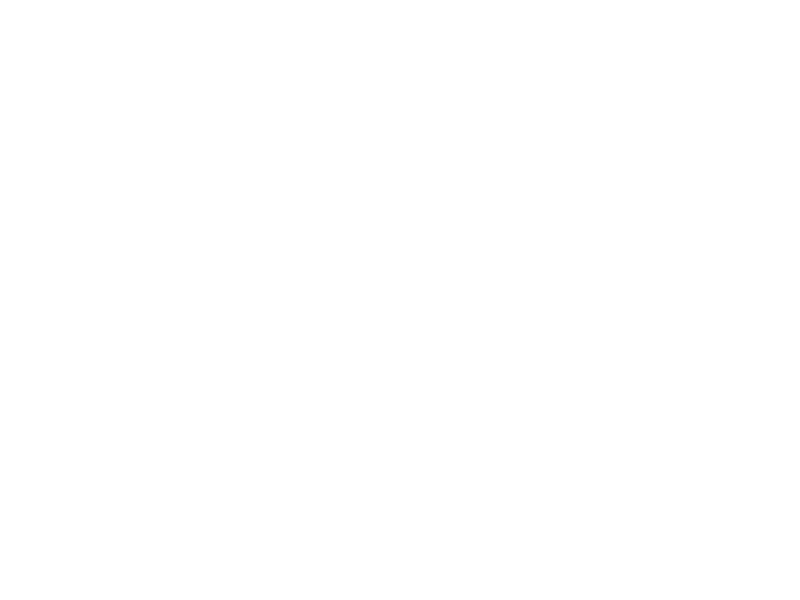

[array([272.15, 243.39]), array([291.8125, 310.07  ])]


In [1]:
# Your code:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
population_density = pd.read_csv("population_density_categorical.csv")

plt.subplot(1,2,1)
B=plt.boxplot(population_density["temperature"])
plt.ylabel("temperature")
whiskers= [item.get_ydata() for item in B['whiskers']]
print(whiskers)
population_density_clean=population_density[np.logical_and(population_density.temperature<whiskers[1][1],population_density.temperature>whiskers[0][1])]

plt.subplot(1,2,2)
B=plt.boxplot(population_density_clean["temperature"])


   (b) Compare basic statistical features of "temperature" (median, mean, and mode) in the cleaned and original datasets.    Interpret the differences for these statistical values between the cleaned and original datasets. 

In [9]:
# Your code:
print(f'mean_original: {population_density["temperature"].mean()}')
print(f'median_original: {population_density["temperature"].mean()}')
print(f'mode_original: {population_density["temperature"].mean()}')

print("\n")      

print(f'mean_wo: {population_density_clean["temperature"].mean()}')
print(f'median_wo: {population_density_clean["temperature"].mean()}')
print(f'mode_wo: {population_density_clean["temperature"].mean()}')
      




mean_original: 281.19296494099206
median_original: 281.19296494099206
mode_original: 281.19296494099206


mean_wo: 281.2515189403546
median_wo: 281.2515189403546
mode_wo: 281.2515189403546


   (c) Compare the number of data rows before and after removing the outliers. How many data rows are removed by removing    outliers?

In [10]:
# Your code:
print(f'Number of data rows in original dataset:  {population_density.shape[0]}')
print(f'Number of data rows in dataset without outliers:  {population_density_clean.shape[0]}')






Number of data rows in original dataset:  43384
Number of data rows in dataset without outliers:  43373


### Basic Visualization (10 points)
   (d) Visualize mean and median of "population_density" for non-'None' "holiday" values in the original dataset. Specify    the "holiday" values for which the mean of "population_density" is maximal and for which it is minimal.

In [11]:
# Your code:
#population_density_non_none = population_density[population_density["holiday"]!="None"]
#plt.boxplot(population_density_non_none["population_density"])
df_non_none = population_density[population_density["holiday"]!="None"]
holiday_categories = df_non_none["holiday"].unique()


newbp = plt.boxplot(df_non_none["population_density"])

print(f'mean_non_none: {df_non_none["population_density"].mean()}')
print(f'median_non_none: {df_non_none["population_density"].mean()}')
      
dict_category={}
      
for category in holiday_categories:
      df_category = df_non_none[df_non_none["holiday"]==category]
      mean=df_category["population_density"].mean()
      dict_category[category]=mean
      #print("df_{} : {}".format(category, mean) )

      
print("Day with max mean population density: {}".format(max(dict_category, key=dict_category.get)))
print("Day with min mean population density: {}".format(min(dict_category, key=dict_category.get)))
      



mean_non_none: 842.2407407407408
median_non_none: 842.2407407407408
Day with max mean population density: New Years Day
Day with min mean population density: Columbus Day


   (e) Plot the distribution of "temperature" in the original and cleaned datasets.

In [12]:
# Your code:
binwidth = 10


plt.subplot(1,3,1)
plt.hist(population_density["temperature"],bins=np.arange(min(population_density["temperature"]), max(population_density["temperature"]) + binwidth, binwidth))
plt.title("original dataset")
plt.xlabel("temperature")

plt.subplot(1,3,3)
plt.hist(population_density_clean["temperature"],bins=np.arange(min(population_density_clean["temperature"]), max(population_density_clean["temperature"]) + binwidth, binwidth))
plt.title("Dataset W/o outliers")
plt.xlabel("temperature")



Text(0.5, 0, 'temperature')

   (f) Explore the distribution of "population_density" and "temperature" together in the cleaned dataset. Specify the ranges of "temperature" and "population_density" for which the frequency of the data is the highest.

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


<IPython.core.display.Javascript object>


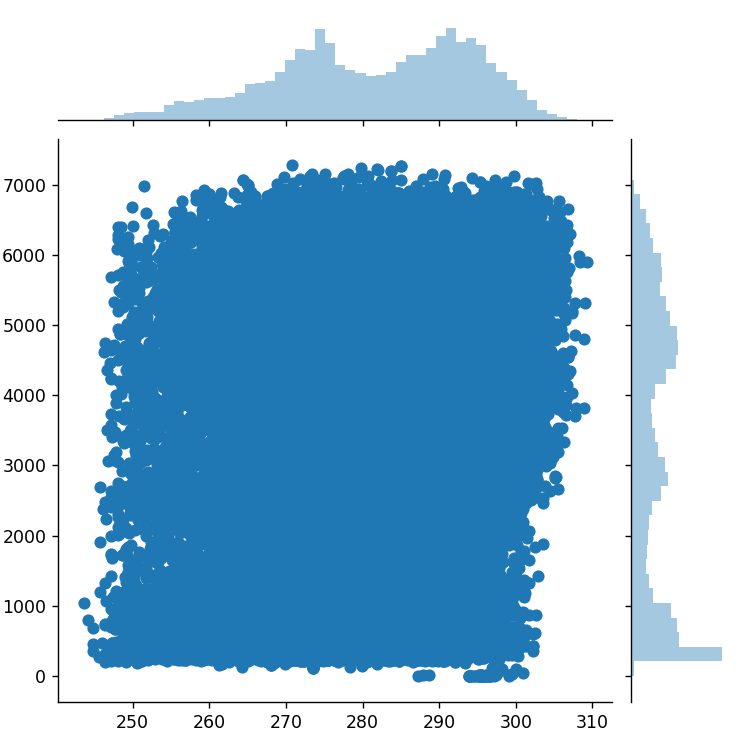

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [13]:
# Your code:
%matplotlib notebook
import seaborn as sns
#sns.pairplot(df_non_none,vars=["temperature","population_density"])
sns.jointplot( 
    x = tuple( population_density_clean[("temperature")] ),
    y = tuple( population_density_clean[("population_density")] ),
    )




Frequency of the dataset is highest for the temperature range between 290 - 292 and population density range between 210 - 420   

## Question 2 - Decision Trees (15 points):

   (a) Add a categorical temperature column to the cleaned dataset based on the following rules and name it                "temperature_categorical":
        - temperature >= upper_quartile (third quartile) corresponding value in 'temperature_categorical' column: 'high'
        - temperature <= lower_quartile (first quartile) corresponding value in 'temperature_categorical' column: 'low'
        - lower_quartile < temperature < upper_quartile corresponding value in 'temperature_categorical' column: 'medium'

In [14]:
# Your code:
conditions = [
    population_density_clean["temperature"]>= np.percentile(population_density_clean["temperature"],75),
    np.logical_and(population_density_clean["temperature"] >=  np.percentile(population_density_clean["temperature"],25), population_density_clean["temperature"]< np.percentile(population_density_clean["temperature"],75)) ,
    population_density_clean["temperature"]<= np.percentile(population_density_clean["temperature"],25)
    
]
print("uq= {}".format(np.percentile(population_density_clean["temperature"],75)))
print("lq= {}".format(np.percentile(population_density_clean["temperature"],25)))
#print(df_non_none["temperature"].max())
#print(df_non_none["temperature"].min())

outputs = ['high', 'medium', 'low']

temperature_categorical = np.select(conditions,outputs,'None')
population_density_clean["temperature_categorical"] = temperature_categorical
population_density_clean.head()




uq= 291.82
lq= 272.16


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Unnamed: 0,holiday,temperature,rain_1h,snow_1h,clouds_percentage,weather_type,weather_type_details,date_time,population_density,population_density_categorical,temperature_categorical
0,21380,None,276.15,0.0,0.0,1,Drizzle,light intensity drizzle,2/19/2016 5:00,2539,low,medium
1,26524,None,286.07,0.0,0.0,1,Clear,sky is clear,9/11/2016 6:00,1276,very low,medium
2,30376,None,274.65,0.0,0.0,90,Mist,mist,1/22/2017 5:00,591,very low,medium
3,29126,None,257.55,0.0,0.0,1,Snow,light snow,12/14/2016 12:00,4944,high,low
4,5723,None,277.23,0.0,0.0,1,Clear,sky is clear,5/3/2013 22:00,2972,medium,medium


   (b) In the new dataset (created in Section 'a'), consider "holiday", "temperature_categorical", and "weather_type" as    the descriptive features and "population_density_categorical" as the target feature. Set the minimum number of samples  for splitting to 5000 and make a decision tree based on entropy.

In [15]:
# Your code:
from p_decision_tree.DecisionTree import DecisionTree

data = population_density_clean.drop(columns = ['Unnamed: 0','temperature','rain_1h', 'snow_1h',
       'clouds_percentage','weather_type_details',
       'date_time', 'population_density'])
data = data[["holiday","temperature_categorical","weather_type","population_density_categorical"]]


# Data preparation
columns = data.columns
descriptive_features = columns[:3]
label = columns[-1]
for column in columns:
    if column in descriptive_features or column in label:
        print(column)
        data[column]= data[column].astype(str)


#df_non_none.info()
data_descriptive = data[descriptive_features].values
data_label = data[label].values

#Calling DecisionTree constructor (the last parameter is criterion which can also be "gini")
decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features, data_label.tolist(), "entropy")

#Here you can pass pruning features (gain_threshold and minimum_samples)
decisionTree.id3(0,5000)

#Visualizing decision tree by Graphviz
#dot = decisionTree.print_visualTree( render=True )

#print(dot)

print("System entropy: ", format(decisionTree.entropy))
print("System gini: ", format(decisionTree.gini))


holiday
temperature_categorical
weather_type
population_density_categorical
System entropy:  2.231362210192917
System gini:  None


   (c) What is the best attribute (based on entropy) for splitting the tree in the second round of ID3?  

Explanation: 
temperature_categorical because , there are only 3 unique types for it while in case of "weather_type" and "holiday", unique types are much more as shown below


In [16]:
print("temperature_types: {}".format(population_density_clean.temperature_categorical.unique())+"\n")
print("weather_types: {}".format(population_density_clean.weather_type.unique())+"\n")
print("holiday_types: {}".format(population_density_clean.holiday.unique())+"\n")

temperature_types: ['medium' 'low' 'high']

weather_types: ['Drizzle' 'Clear' 'Mist' 'Snow' 'Clouds' 'Rain' 'Haze' 'Fog' 'Smoke'
 'Thunderstorm' 'Squall']

holiday_types: ['None' 'Veterans Day' 'Thanksgiving Day' 'Memorial Day' 'Labor Day'
 'Independence Day' 'Martin Luther King Jr Day' 'Columbus Day'
 'State Fair' 'Christmas Day' 'New Years Day' 'Washingtons Birthday']



In [17]:
from IPython.display import IFrame
IFrame("output/visualTree.gv.pdf", width=1000, height=400)
# not displaying , please refer output directory


## Question 3 - Regression (10 points):

For this question (Q3), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density*. Drop the information on the date for *date_time* and restrict the data to time values (hour) only.

We define *population_density* to be our target feature, while all other features are considered descriptive.

In [34]:
# Your code:
population_density["time"]= pd.to_datetime(population_density["date_time"]).dt.time


df_Q3 = population_density[["holiday","temperature","rain_1h","snow_1h","clouds_percentage","time", "population_density"]]

# Data preparation
columns = df_Q3.columns

columns


Index(['holiday', 'temperature', 'rain_1h', 'snow_1h', 'clouds_percentage',
       'time', 'population_density'],
      dtype='object')

   (a) Which features are suitable as an input for linear regression and which need to be modified first? Why?

Explanation:
categorical features : 'holiday' 

Numerical features : 'temperature', 'rain_1h', 'snow_1h', 'clouds_percentage','time'

Numerical features are suitable to be used with linear regression because it works with numerical data while we need to modify categorical feature('holiday' in this case) to make it suitable.



   (b) Implement and briefly motivate an adequate modification. Print the resulting data set limited to the first two data rows.

Explanation:
We will binary encode 'holiday' because as shown below different holidays do not affect population density as much as "not a holiday" and "holiday" does.


<IPython.core.display.Javascript object>


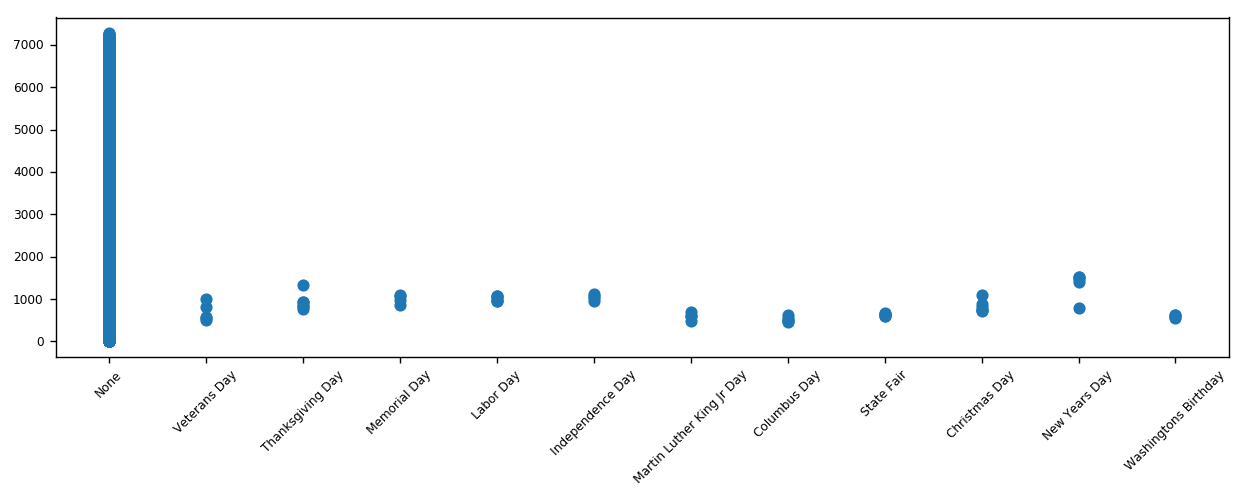

In [35]:
import matplotlib
matplotlib.rcParams.update({'font.size': 7})
plt.figure(figsize=(10,4))
plt.scatter(df_Q3['holiday'], df_Q3['population_density'])
plt.xticks(rotation=45)
plt.tight_layout()


In [36]:
# Your code:
holidays = df_Q3['holiday']
holiday_list=[]
for holiday in holidays:
    if holiday == "None":
        holiday_list.append(1)
    else:
        holiday_list.append(0)
        
df_Q3['holiday']=holiday_list

x=[]
for value in df_Q3["time"]:
    value = value.hour
    x.append(value)

df_Q3["time"] = x



c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [37]:
df_Q3.head()

,holiday,temperature,rain_1h,snow_1h,clouds_percentage,time,population_density
0,1,276.15,0.0,0.0,1,5,2539
1,1,286.07,0.0,0.0,1,6,1276
2,1,274.65,0.0,0.0,90,5,591
3,1,257.55,0.0,0.0,1,12,4944
4,1,277.23,0.0,0.0,1,22,2972


(c) To get a first idea about our data, plot the behaviour of the target feature (population_density) over time (date_time).

<IPython.core.display.Javascript object>


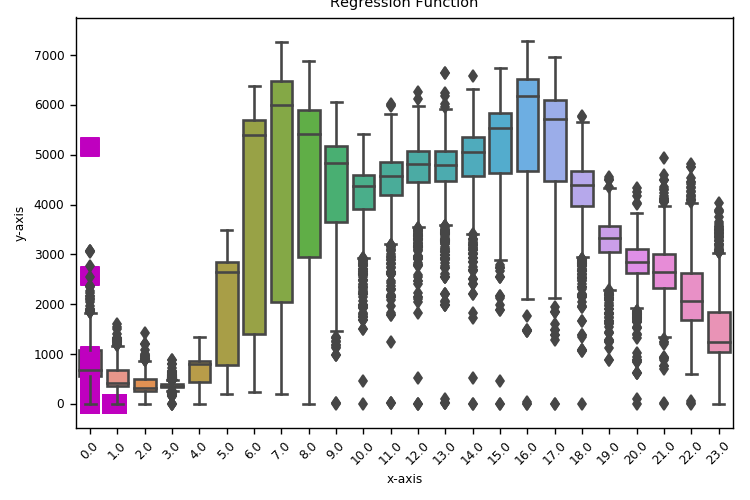

In [232]:
# Your code:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6,4))
plt.rcParams.update({'font.size': 7})
sns.boxplot(x=df_Q3.time, y=df_Q3.population_density)
plt.xticks(rotation=45)
plt.tight_layout()



<IPython.core.display.Javascript object>


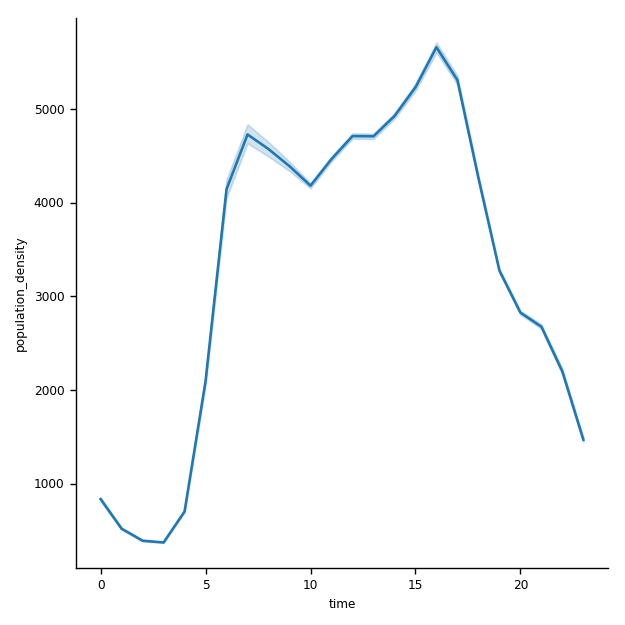

In [231]:
sns.relplot(x="time", y="population_density", kind="line", data=df_Q3)


   (d) Create two distinct subsets of the data. Use sampling methods as described in the lecture. You should end up with two DIFFERENT sample data sets *RegA, RegB*. Include these data sets in the submitted data set zip file. 
   
   Which sampling methods did you choose and why? Which one do you expect to result in a better classifier?

From below curve we see that more data is taken in 'very low' and 'High' population density region so we will down sample the data from these bins, i.e. we will perform **undersampling**

In [158]:
avg_count = len(df_Q3[np.logical_and(df_Q3["population_density"]>= 2912, df_Q3["population_density"]<4368)])
med_indices = df_Q3[np.logical_and(df_Q3["population_density"]>= 2912, df_Q3["population_density"]<4368)].index
very_low_indices = df_Q3[df_Q3.population_density <= 1456].index
high_indices = df_Q3[np.logical_and(df_Q3["population_density"] >= 4368, df_Q3["population_density"]<5824)].index
very_high_indices = df_Q3[df_Q3["population_density"]>= 5824].index
low_indices = df_Q3[np.logical_and(df_Q3["population_density"]>= 1456, df_Q3["population_density"]<2912)].index
random_indices_very_low = np.random.choice(very_low_indices,avg_count-5000,replace=False) # lesser samples from very_low 
random_indices_high = np.random.choice(high_indices,avg_count-1000,replace=False)

under_sample_indices = np.concatenate([random_indices_very_low,low_indices,med_indices,random_indices_high,very_high_indices])

RegA = df_Q3.loc[under_sample_indices]  





In [160]:
print(len(RegA))
RegA = RegA.loc[~RegA.index.duplicated(keep='first')] # to remove overlapping indexes(if any)
print(len(RegA))

29743
29742


In [204]:
RegA.to_csv("RegA_undersampling.csv")

In [218]:
# Your code:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
%matplotlib notebook





#Data Normalization 
featurelist = list(RegA.columns[:])
numericalFeatures = ['holiday','temperature', 'rain_1h', 'snow_1h','clouds_percentage','time','population_density']


def normalizeCategorizeClean(setName,setNumericFeatures,featureOrder):
    concatenationList = []
    for feature in featureOrder:
        
        featureIndex = featureOrder.index(feature)
        featureData = setName[[feature]]
        
        if feature in setNumericFeatures:
            min_max_scaler = MinMaxScaler()
            setName[[feature]] = setName[[feature]].astype(float)
            featureDataScaled = min_max_scaler.fit_transform(featureData)
            featureData = pd.DataFrame(featureDataScaled, columns=[feature])  
                       
        concatenationList.append(featureData)
        
    mergedAll = pd.concat(concatenationList, axis=1)
    return mergedAll

normalizedOneHotted_undersampled = normalizeCategorizeClean(RegA,numericalFeatures,featurelist)
df_Q3_normalized = normalizeCategorizeClean(df_Q3,numericalFeatures,featurelist)


    



c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

**Stratified Sampling**

In [274]:
sample_count = 4303 # basically, all the samples from very_low pop density category
med_indices = df_Q3[np.logical_and(df_Q3["population_density"]>= 2912, df_Q3["population_density"]<4368)].index
very_low_indices = df_Q3[df_Q3.population_density <= 1456].index
high_indices = df_Q3[np.logical_and(df_Q3["population_density"] >= 4368, df_Q3["population_density"]<5824)].index
very_high_indices = df_Q3[df_Q3["population_density"]>= 5824].index
low_indices = df_Q3[np.logical_and(df_Q3["population_density"]>= 1456, df_Q3["population_density"]<2912)].index

random_indices_very_low = np.random.choice(very_low_indices,sample_count,replace=False) # lesser samples from very_low 

random_indices_high = np.random.choice(high_indices,sample_count,replace=False)

random_indices_med = np.random.choice(med_indices,sample_count,replace=False)

random_indices_low = np.random.choice(low_indices,sample_count,replace=False)

random_indices_very_high = np.random.choice(very_high_indices,sample_count,replace=False)


strat_sample_indices = np.concatenate([random_indices_very_low,random_indices_low,random_indices_med,random_indices_high,random_indices_very_high])

RegB = df_Q3.loc[strat_sample_indices] 

print(len(RegB))
RegB = RegB.loc[~RegB.index.duplicated(keep='first')] # to remove overlapping indexes(if any)
print(len(RegB))

RegB.to_csv("RegB_stratsampling.csv")


21515
21513


In [275]:
normalizedOneHotted_stratsampled = normalizeCategorizeClean(RegB,numericalFeatures,featurelist)

Explanation:
We chose Undersampling and Stratified sampling to make sure that all categories of population density has equal contribution in the dataset, which was imbalanced as shown in the histogram above.


   (e) Train a linear regression classifier based on each of the two sample data sets *RegA, RegB* created before.

In [276]:
# Your code:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X_under = normalizedOneHotted_undersampled.loc[:,normalizedOneHotted_undersampled.columns != 'population_density']
y_under = normalizedOneHotted_undersampled.loc[:,normalizedOneHotted_undersampled.columns == 'population_density']
X_train_U, X_test_U, y_train_U, y_test_U = train_test_split(X_under,y_under,test_size = 0.2, random_state = 23)

lm = LinearRegression()
model = lm.fit(X_train_U,y_train_U)
y_pred_U = lm.predict(X_test_U)

X_strat = normalizedOneHotted_stratsampled.loc[:,normalizedOneHotted_stratsampled.columns != 'population_density']
y_strat = normalizedOneHotted_stratsampled.loc[:,normalizedOneHotted_stratsampled.columns == 'population_density']
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_strat,y_strat,test_size = 0.2, random_state = 23)

lm2 = LinearRegression()
model = lm2.fit(X_train_S,y_train_S)
y_pred_S = lm2.predict(X_test_S)


X = df_Q3_normalized.loc[:,df_Q3_normalized.columns != 'population_density']
y = df_Q3_normalized.loc[:,df_Q3_normalized.columns == 'population_density']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 23)

lm3 = LinearRegression()
model = lm3.fit(X_train,y_train)
y_pred = lm3.predict(X_test)





(f) Visualize both computed regression functions in one plot each, combined with the original data set. For example, you can show a plot similar to 3(c) and insert the regression functions result.

In [262]:
# Your code:




   (g) For each of the two resulting models compute and print the mean squared error, mean absolute error and median squared error with respect to the original, non-sampled data set. Also, present plots showing the errors and squared errors.

In [277]:
# Your code:
print("----------------------------------------------------Under Sampling------------------------------------")

print('RegA_Mean Absolute Error:', metrics.median_absolute_error(y_test_U, y_pred_U))  
print('RegA_Mean Squared Error:', metrics.mean_squared_error(y_test_U, y_pred_U))  
print('RegA_Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_U, y_pred_U)))

print("----------------------------------------------------Stratified Sampling------------------------------------")

print('RegB_Mean Absolute Error:', metrics.median_absolute_error(y_test_S, y_pred_S))  
print('RegB_Mean Squared Error:', metrics.mean_squared_error(y_test_S, y_pred_S))  
print('RegB_Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_S, y_pred_S)))

print ("---------------------------------------------Original Data------------------------------------------------")
print('RegB_Mean Absolute Error:', metrics.median_absolute_error(y_test, y_pred))  
print('RegB_Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('RegB_Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))





----------------------------------------------------Under Sampling------------------------------------
RegA_Mean Absolute Error: 0.17654362329481255
RegA_Mean Squared Error: 0.054936152224470576
RegA_Root Mean Squared Error: 0.23438462454792247
----------------------------------------------------Stratified Sampling------------------------------------
RegB_Mean Absolute Error: 0.24893675240296936
RegB_Mean Squared Error: 0.0716167211776862
RegB_Root Mean Squared Error: 0.2676130063686857
---------------------------------------------Original Data------------------------------------------------
RegB_Mean Absolute Error: 0.22334684898224538
RegB_Mean Squared Error: 0.9271187583082494
RegB_Root Mean Squared Error: 0.9628700630449829


   (h) Interpret and evaluate the two models and compare them. Why are they similar/different? Which model do you recommend and why? How do you think the applied methods could be improved to get better results?

Explanation:


## Question 4 - Support Vector Machines (10 points):

For this question (Q4), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density_categorical*. For *date_time*, drop the information on the date and restrict the data to time values only.
We define *population_density_categorical* to be our target feature, while all other features are considered descriptive.


In [52]:
# Your code:
population_density["time"]= pd.to_datetime(population_density["date_time"]).dt.time

df_Q3 = population_density[["holiday","temperature","rain_1h","snow_1h","clouds_percentage","time", "population_density_categorical"]]

df_Q3.head()





,holiday,temperature,rain_1h,snow_1h,clouds_percentage,time,population_density_categorical
0,None,276.15,0.0,0.0,1,05:00:00,low
1,None,286.07,0.0,0.0,1,06:00:00,very low
2,None,274.65,0.0,0.0,90,05:00:00,very low
3,None,257.55,0.0,0.0,1,12:00:00,high
4,None,277.23,0.0,0.0,1,22:00:00,medium


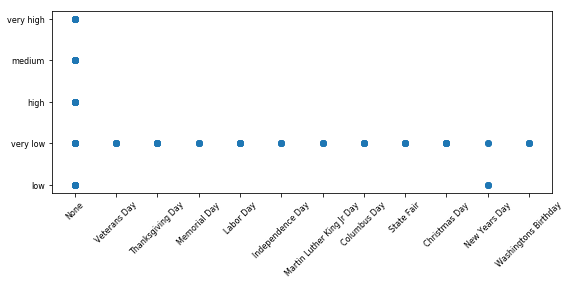

In [45]:
import matplotlib
matplotlib.rcParams.update({'font.size': 8})
plt.figure(figsize=(8,4))
plt.scatter(df_Q3['holiday'], df_Q3['population_density_categorical'])
plt.xticks(rotation=45)
plt.tight_layout()


This shows that population density is higher on 'None' days , while in holiday days its not varying much so we can drop this column

   (a) Which features are suitable as an input for SVM and which need to be modified first? Modify the data as needed and provide a brief explanation.

Temperature, rain_1h, snow_1h and cloud percentage are already continous and therefore they can be used as inputs, time has to be modified.

We can modify the time values to categories such as morning, noon, evening and night and again hot encode them

In [53]:
df_Q3['time'] = df_Q3['time'].apply(lambda x: x.hour)
df_Q3=df_Q3.drop(['holiday'], axis=1)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


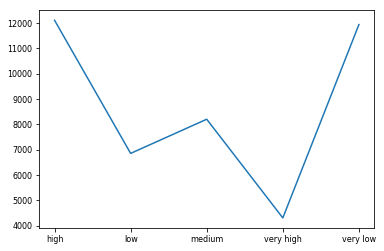

In [54]:
X = df_Q3.drop(['population_density_categorical'],axis=1)
y = df_Q3["population_density_categorical"]


unique,count = np.unique(y, return_counts = True)
dict_y = {k:v for (k,v) in zip(unique,count)}
dict_y
plt.plot(dict_y.keys(),dict_y.values())


This shows that we have very few samples of "very high" type , this implies that we have to either downsample other categories or increase values for the one which is lower.

In [55]:
sample_count = len(df_Q3[df_Q3["population_density_categorical"]=="very high"].index) # basically, all the samples from very_low pop density category



In [56]:
med_indices = df_Q3[df_Q3["population_density_categorical"]=="medium"].index
very_low_indices = df_Q3[df_Q3["population_density_categorical"]=="very low"].index
high_indices = df_Q3[df_Q3["population_density_categorical"]=="high"].index
very_high_indices = df_Q3[df_Q3["population_density_categorical"]=="very high"].index
low_indices = df_Q3[df_Q3["population_density_categorical"]=="low"].index

random_indices_very_low = np.random.choice(very_low_indices,sample_count,replace=False) # lesser samples from very_low 

random_indices_high = np.random.choice(high_indices,sample_count,replace=False)

random_indices_med = np.random.choice(med_indices,sample_count,replace=False)

random_indices_low = np.random.choice(low_indices,sample_count,replace=False)

random_indices_very_high = np.random.choice(very_high_indices,sample_count,replace=False)


strat_sample_indices = np.concatenate([random_indices_very_low,random_indices_low,random_indices_med,random_indices_high,random_indices_very_high])

svm_data = df_Q3.loc[strat_sample_indices] 

print(len(svm_data))
svm_data = svm_data.loc[~svm_data.index.duplicated(keep='first')] # to remove overlapping indexes(if any)
print(len(svm_data))

svm_data.to_csv("svm_data_stratsampling.csv")


21515
21515


Explanation:



   (b) Divide the data set into a training set *svmTrain* and a test set *svmTest* and briefly motivate your division      strategy. Include these data sets in the data set zip file you submit. 
   
   Hint: Training the SVMs will take longer for a large training set!

In [57]:
# Your code:
from sklearn.model_selection import train_test_split
#data = df_Q3.drop(columns = ['holiday'])
#data = data[["temperature","rain_1h","snow_1h","time","population_density_categorical"]]

use_data = svm_data.sample(frac=0.5, random_state=384146)

features = use_data.columns.tolist()
features.remove('population_density_categorical')
svmTrain = use_data[features]
svmTest = use_data['population_density_categorical']

#train_pct_index = int(0.9 * len(data))
#X_train, X_test = svmTrain[:train_pct_index], svmTest[train_pct_index:]
#y_train, y_test = svmTest[:train_pct_index], svmTest[train_pct_index:]
X_train,X_test,y_train,y_test = train_test_split(svmTrain,svmTest,test_size = 0.2, random_state = 23)


#df_non_none.info()
#data_descriptive = data[descriptive_features].values
#data_label = data[label].values




In [58]:
for feature in features:
    print("No. of unique values for {} = {}".format(feature,len(use_data[feature].unique())))

No. of unique values for temperature = 4097
No. of unique values for rain_1h = 202
No. of unique values for snow_1h = 10
No. of unique values for clouds_percentage = 50
No. of unique values for time = 24


In [59]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
model = SVC() 
model.fit(X_train, y_train) 
  
# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions))


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

        high       0.58      0.58      0.58       446
         low       0.60      0.63      0.61       435
      medium       0.57      0.45      0.51       427
   very high       0.62      0.83      0.71       398
    very low       0.88      0.75      0.81       446

    accuracy                           0.65      2152
   macro avg       0.65      0.65      0.64      2152
weighted avg       0.65      0.65      0.64      2152



Explanation:
To be able to estimate how successful our training is, we divide the dataset into two parts: a big one, called training data, that you use for training, and a small one, called testing data, to check results of a trained model. Population density categorical will be tested based on the trained model.


   (c) Use the training set to train 3 different SVMs with different combinations of the parameters. Use at least two distinct values for the parameters *kernel* and *C*.

In [60]:
# Your code:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 



c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [61]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


   (d) Compute and print the mean accurracy and classification report of the trained SVMs with respect to the test set (as shown in instruction).

In [63]:
# Your code:
from sklearn.model_selection import cross_val_score
predictions = grid.predict(X_test)
all_accuracies = cross_val_score(estimator=grid, X=X_train, y=y_train, cv=3)
print(all_accuracies)
print(all_accuracies.mean())

print(classification_report(y_test, predictions))

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.62077379 0.63262461 0.64783821]
0.6337455371459026
              precision    recall  f1-score   support

        high       0.62      0.56      0.59       446
         low       0.59      0.65      0.62       435
      medium       0.58      0.43      0.49       427
   very high       0.58      0.86      0.69       398
    very low       0.88      0.74      0.80       446

    accuracy                           0.64      2152
   macro avg       0.65      0.65      0.64      2152
weighted avg       0.65      0.64      0.64      2152



In [62]:
model1 = SVC(C=1.0, kernel='rbf',gamma=0.1) 
model1.fit(X_train, y_train) 
  
# print prediction results 
predictions = model1.predict(X_test) 
print("report for model 1:{}".format(classification_report(y_test, predictions)))

model2 = SVC(C=10, kernel='rbf',gamma=0.01) 
model2.fit(X_train, y_train) 
  
# print prediction results 
predictions = model2.predict(X_test) 
print("report for model 2:{}".format(classification_report(y_test, predictions)))

model3 = SVC(C=1.0, kernel='linear',gamma=0.1) 
model3.fit(X_train, y_train) 
  
# print prediction results 
predictions = model3.predict(X_test) 
print("report for model 3:{}".format(classification_report(y_test, predictions)))

report for model 1:              precision    recall  f1-score   support

        high       0.62      0.56      0.59       446
         low       0.59      0.65      0.62       435
      medium       0.58      0.43      0.49       427
   very high       0.58      0.86      0.69       398
    very low       0.88      0.74      0.80       446

    accuracy                           0.64      2152
   macro avg       0.65      0.65      0.64      2152
weighted avg       0.65      0.64      0.64      2152

report for model 2:              precision    recall  f1-score   support

        high       0.57      0.59      0.58       446
         low       0.59      0.62      0.61       435
      medium       0.57      0.35      0.43       427
   very high       0.58      0.79      0.67       398
    very low       0.82      0.80      0.81       446

    accuracy                           0.63      2152
   macro avg       0.63      0.63      0.62      2152
weighted avg       0.63      0.63      

   (e) Interpret and evaluate the 3 SVMs and compare them. Why are they similar/different? Which SVM do you recommend and why?

Explanation:


## Question 5 - Neural Networks (20 points)
In this question consider the whole dataset that you have created in the *Preprocessing of Dataset* section. The target feature is *population_density_categorical*. 

To avoid performance problems, use the first 4000 rows of your dataset (you will need 2000 for training and 2000 for testing).

   (a) What are the possible inputs of your network?
     - Show the possible extracted features.
     - Show the number of possible patterns of inputs for the categorical data.

There are 3 categorical features "holiday, weather_type, weather_type_details", so the number of possible pattern of inputs = 2^(no. of categorical features) -1 = 2^(3) - 1 = 7, as shown below.

In [279]:
import pandas as pd
import numpy as np
from itertools import combinations

df = pd.read_csv(r"population_density_categorical.csv")
df_5 = df.loc[0:3999]
df_5.head()


#dropping date from date_time column
df_5["date_time"]= pd.to_datetime(df_5["date_time"]).dt.time
df_5['date_time'] = df_5['date_time'].apply(lambda x: x.hour)

df_5.drop(['Unnamed: 0'], axis=1, inplace=True)


allfeatures = df_5.columns[:-2]
categoricalFeatures = [ 'holiday', 'weather_type', 'weather_type_details']

def getAllPossibleCombinations(featureList):
    featureSet = set(featureList)
    allCombinations = sum(map(lambda r: list(combinations(featureSet, r)), range(1, len(featureSet)+1)), [])
    # now combinations are there, but each as a tuple
    combinationList = []
    for combination in allCombinations:
        x = list(combination)
        combinationList.append(x)
    return combinationList


total_possible_inputs = getAllPossibleCombinations(allfeatures)
total_possible_categorical_inputs= getAllPossibleCombinations(categoricalFeatures)

print("number of possible inputs: {}".format(len(total_possible_inputs)))
print("number of possible categorical inputs: {}".format(len(total_possible_categorical_inputs)))



c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


number of possible inputs: 255
number of possible categorical inputs: 7


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


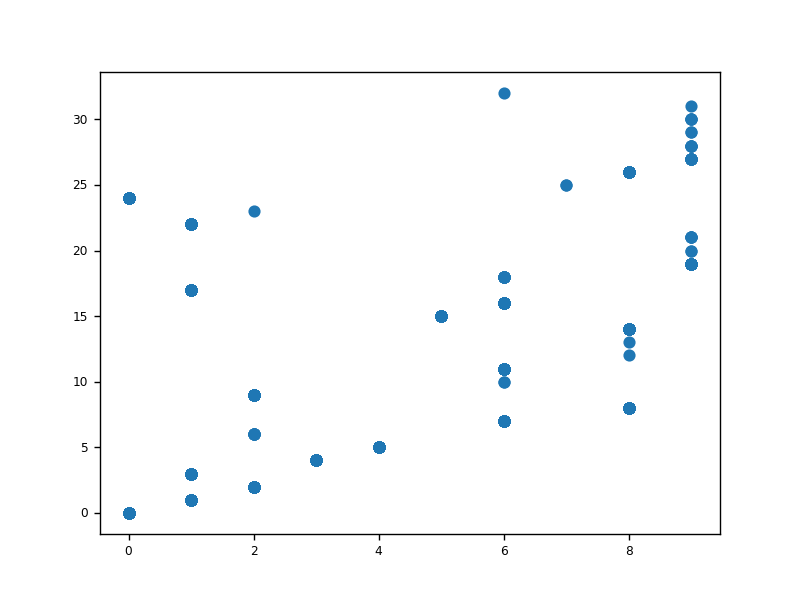

In [280]:
#checking difference between weather_type and weather_type_details
import matplotlib.pyplot as plt
cat_features= ['weather_type','weather_type_details']

cat_df = df_5[cat_features]

for column in cat_features:
    cat_df[column] = cat_df[column].astype('category')
    cat_df[column] = cat_df[column].cat.codes


plt.scatter(cat_df['weather_type'], cat_df['weather_type_details'])


#corr = cat_df_weather.corr()
#corr.style.background_gradient(cmap='coolwarm')

#This shows that the unique values of "weather_type_details" are correlated to values in "weather_type" so we can drop this column
df_5.drop(['weather_type_details'], axis=1, inplace=True)






Explanation:


   (b) Before using the Neural Network algorithm, do you think it provides an accurate result? Why? 
     - Your explanation should be supported by data.

Explanation:
No because population density doesn't share a linear relationship with "date_time", so one layer will not be sufficient

<IPython.core.display.Javascript object>


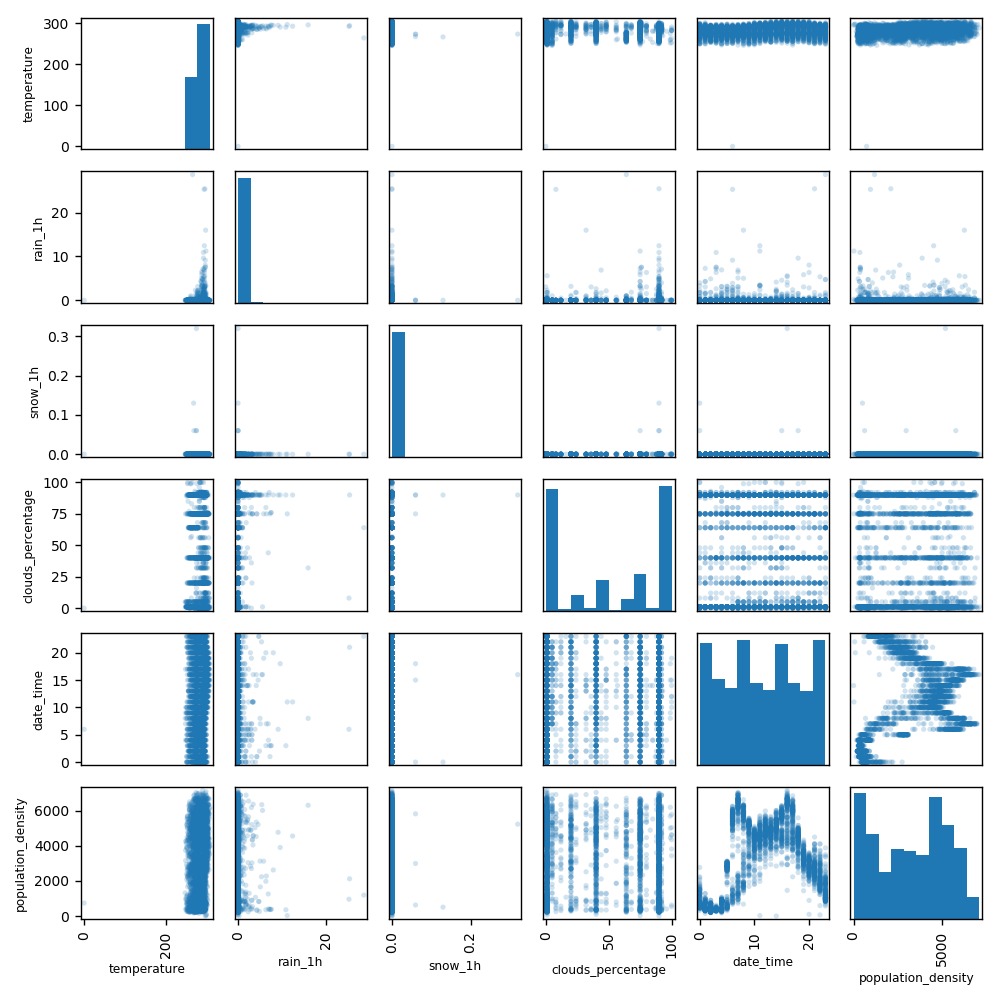

In [282]:
# Your code:
import pandas as pd
pd.plotting.scatter_matrix(df_5, alpha=0.2, figsize=(8,8))
plt.tight_layout()





   (c) Which features can be used for designing your network as inputs? Why?
       - Which features should be changed (example: from categorical to numerical or numerical to categorical)? Why? 
       - Convert the features. 

Explanation:
used Attributes:

['temperature', 'date_time', 'cloud_percentage','holiday, 'weather_type']

Based on a correlation matrix, and real-life scenarios where "time" during the day greatly determines population density, it could be a primary choice for guessing population density.  

Although I can add all the features of the dataset(excluding "population_density_categorical") as inputs to my network, It might overfit the data.

While using all the features, it takes a great time to train the model; therefore, I made some educated guesses and also run correlation matrix, and preferred to use the features listed above.

P.S.- Based on real life scenario I think it would also be useful to include "holiday" and "weather_type" in input features.
But since, they are categorical in nature we would need to change them ( we will be using oneHotencoding)



In [284]:
# Your code:
from sklearn import preprocessing



featurelist = list(df_5.columns[:-2])

custom_feature = ['holiday']
categoricalFeatures = ['weather_type']
numericalFeatures = ['temperature', 'rain_1h', 'snow_1h','clouds_percentage','date_time']
label = ['population_density_categorical']
    
def normalizeCategorizeClean(setName, setCategoricalFeatures, setNumericFeatures, featureOrder):
    concatenationList = []
    for feature in featureOrder:
        
        featureIndex = featureOrder.index(feature)
        featureData = setName[[feature]]
        
        if feature in setNumericFeatures:
            min_max_scaler = preprocessing.MinMaxScaler()
            setName[[feature]] = setName[[feature]].astype(float)
            featureDataScaled = min_max_scaler.fit_transform(featureData)
            featureData = pd.DataFrame(featureDataScaled, columns=[feature])
            
        if feature in setCategoricalFeatures:
            oneHottedData = pd.get_dummies(featureData)
            oneHotFeatList = oneHottedData.columns.tolist()
            featureData = pd.DataFrame(oneHottedData, columns=oneHotFeatList)
            
                       
        concatenationList.append(featureData)
        
    mergedAll = pd.concat(concatenationList, axis=1)
    return mergedAll



   (d) Train your network with default hyperparameters and return the parameters.

In [285]:
# Your code:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

categoricalFeatures = [ 'holiday', 'weather_type']
numericalFeatures = ['temperature', 'rain_1h', 'snow_1h','clouds_percentage','date_time']


usedAttribs = ['temperature','date_time']
labels = df_5['population_density_categorical'].values

list_label=[]
for label in labels:
    if label == "very high":
        list_label.append(4)
    elif label=="high":
        list_label.append(3)
    elif label == "medium":
        list_label.append(2)
    elif label == "low":
        list_label.append(1)
    elif label == "very low":
        list_label.append(0)

normalizedOneHotted = normalizeCategorizeClean(df_5, categoricalFeatures, numericalFeatures, usedAttribs)

X_train,X_test,y_train,y_test = train_test_split(normalizedOneHotted,labels,test_size = 0.2)


# default params
defaultNetwork = MLPClassifier()
print(defaultNetwork.get_params())

#columnsForAllData = allData.columns[:-1]
#columnsForAllData = columnsForAllData.tolist()

trainedModel = defaultNetwork.fit(X_train, y_train)
currentScore = trainedModel.score(X_test, y_test)
predicstOfDefaultModel = trainedModel.predict(X_test)

print(currentScore)



c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
0.6375


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


   (e) Try to find an optimized number of hidden layers and nodes. 
      - Start with default numbers and then at least go with one number above and one number below the default.
      - Use the 2000 rows of the data for training.
      - What are the optimized numbers of hidden layers and nodes that you have found?

In [293]:
# Your code: (number of hidden layers)

for i in range(0,3):
    network = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
    model = network.fit(X_train, y_train)
    currentScore = model.score(X_test, y_test)
    print("Hidden Layer: ", "Default" "|" "Test Score: ", currentScore)

for i in range(0,3):
    network = MLPClassifier(hidden_layer_sizes=(), max_iter=300)
    model = network.fit(X_train, y_train)
    currentScore = model.score(X_test, y_test)
    print("Hidden Layer: ", "lower" "|" "Test Score: ", currentScore)

for i in range(0,3):
    network = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=300)
    model = network.fit(X_train, y_train)
    currentScore = model.score(X_test, y_test)
    print("Hidden Layer: ", "Higher" "|" "Test Score: ", currentScore)
    




c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Hidden Layer:  Default|Test Score:  0.635


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Hidden Layer:  Default|Test Score:  0.65125


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Hidden Layer:  Default|Test Score:  0.64875


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Hidden Layer:  lower|Test Score:  0.54375
Hidden Layer:  lower|Test Score:  0.54875


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Hidden Layer:  lower|Test Score:  0.5525
Hidden Layer:  Higher|Test Score:  0.68375
Hidden Layer:  Higher|Test Score:  0.67
Hidden Layer:  Higher|Test Score:  0.695


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# Your code: (number of nodes in the hidden layer)



In [ ]:
# Your code: (optimized network) 



Explanation:


   (f) Try to train your model with one linear activation function and one non-linear activation function. Use the default number of hidden layers and nodes.
     - Name the functions and explain how the results are different and why. 
     - You can use evaluation metrics to show which activation function works better for this data set.
     - Use the 2000 rows of the data for training.

In [295]:
# Your code: (linear activation function):
for i in range(0,10):
        network = MLPClassifier(activation='identity', max_iter=300)
        model = network.fit(X_train,y_train)
        currentScore = model.score(X_test,y_test)
        print("Activation Function : ", 'identity' "|" "Test Score: ", currentScore)

y_hat_identity = model.predict(X_test)

Activation Function :  identity|Test Score:  0.5825
Activation Function :  identity|Test Score:  0.58375
Activation Function :  identity|Test Score:  0.5925
Activation Function :  identity|Test Score:  0.60125
Activation Function :  identity|Test Score:  0.59125
Activation Function :  identity|Test Score:  0.6025
Activation Function :  identity|Test Score:  0.58375
Activation Function :  identity|Test Score:  0.58875
Activation Function :  identity|Test Score:  0.61125
Activation Function :  identity|Test Score:  0.57375


In [296]:
# Your code: (non-linear activation function):
for i in range(0,10):
        network = MLPClassifier(activation='relu', max_iter=300)
        model = network.fit(X_train,y_train)
        currentScore = model.score(X_test,y_test)
        print("Activation Function : ", 'relu' "|" "Test Score: ", currentScore)

y_hat_relu = model.predict(X_test) 


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Activation Function :  relu|Test Score:  0.64


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Activation Function :  relu|Test Score:  0.65375


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Activation Function :  relu|Test Score:  0.6525


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Activation Function :  relu|Test Score:  0.64


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Activation Function :  relu|Test Score:  0.63375


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Activation Function :  relu|Test Score:  0.65


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Activation Function :  relu|Test Score:  0.64625


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Activation Function :  relu|Test Score:  0.63625


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Activation Function :  relu|Test Score:  0.6475
Activation Function :  relu|Test Score:  0.655


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Explanation:
First we trained with **'identity'** function which is basically f(x)=x and the results obtained were not better than a guess with score of mere 50% ,
later we trained with non-linear function **'relu'** which is R(z)=max(0,z), in this case, the results obtained were much better. 


## Question 6 - Evaluation (10 Points)

   (a) Consider one of the models in question 4 (c) of your choice, one neural network with optimized number of hidden layers and nodes from question 5 (e), and the neural network with non-linear activation function from question 5 (f), for a total of *three* models, together with their respective datasets. Compute the following metrics for a 3-fold cross validation performed on each model:

- Confusion matrices on the training data (sum cell-by-cell the results of each fold)

In [ ]:
# Your code for the confusion matrices on the training data



- Confusion matrices on the test data (sum cell-by-cell the results of each fold)

In [ ]:
# Your code for the confusion matrices on the test data



- Precision, recall and F1-scores on the test data (give explicitly the result for each fold)

In [ ]:
# Your code for precision, recall and F1-scores on the test data



- Accuracy scores on training and test data (give explicitly the result for each fold)

In [ ]:
# Your code for accuracy scores on training and test data



In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the questions 1 through 5 of the assignment.

   (b) What is, in your opinion, the best model? Motivate your answer with the correct performance metrics.

Explanation:


   (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the correct performance metrics.

Explanation:


   (d) What is the effect of employing cross validation, instead of simply holding our a certain percentage of examples as test/validation set? What are the advantages and disadvantages of cross validation?

Explanation:
